# Problem Statement

* Mobile apps like Youtube red ,Tinder for example, has free service in hope to entice users to subscription based model.
* Goal is to convert free members to paid members

* Our problem has a fintech company which provides customers 
    with paid mobile app to track all finances in one place.
    Company has a free version with some features locked.
* We have to find customers who will not enroll in paid product. Therefore, improving targeting.

# Data 
* Detailed behavioural data of users - when they installed, what features they used and what screens they looked at.
* Data is only of first day of the user because free trial till 24 hours, after which company wants to target them with new offers.

# Dataset and EDA

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser

In [136]:
data=pd.read_csv('appdata10.csv')

In [137]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [138]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
# Data cleaning
#Time is in UTC
data['hour']=data.hour.str.slice(1,3).astype('int')

In [140]:
#Plotting
#Remove all columns not needed
data2=data.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])

In [141]:
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


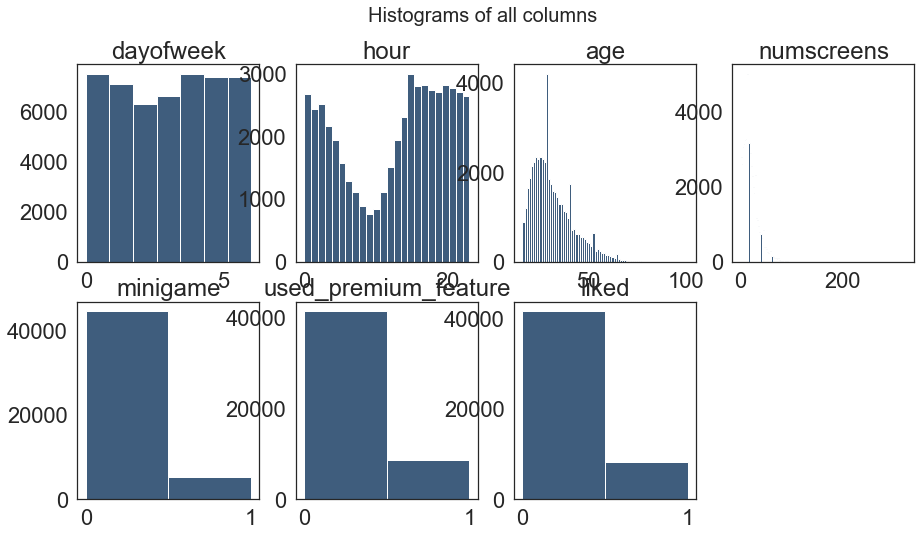

In [142]:
#Histograms
plt.figure(figsize=(15,8))
plt.suptitle('Histograms of all columns',fontsize=20)
c=1
for i in data2.columns:
    #dimensions of image
    plt.subplot(2,4,c)
    c+=1
    f=plt.gca() #creates field
    f.set_title(i)
    #how many bins to use
    vals=np.size(data2.loc[:,i].unique()) #how many unique values
    plt.hist(data2.loc[:,i],bins=vals,color='#3F5D7D')


In [143]:
# We see 9-10 am UTC drop mean late night in PST

In [144]:
#Correlation Plot - how each IV affects the DV, find which features are imp

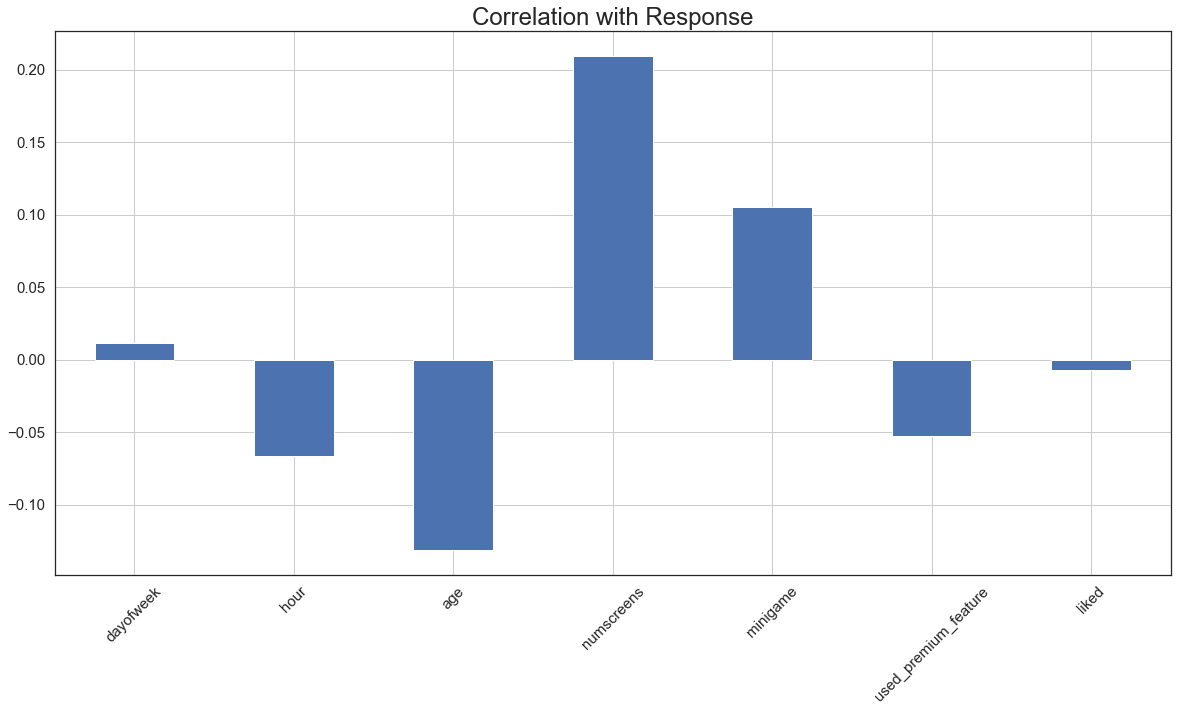

In [145]:
#Only with target variable
data2.corrwith(data['enrolled']).plot.bar(figsize=(20,10),
                                         title='Correlation with Response',fontsize=15,grid=True,rot=45);

In [146]:
#Correlation matrix
#Which field may be strongly related to each other - to avoid multicollinearity
# to satisfy independence assumption

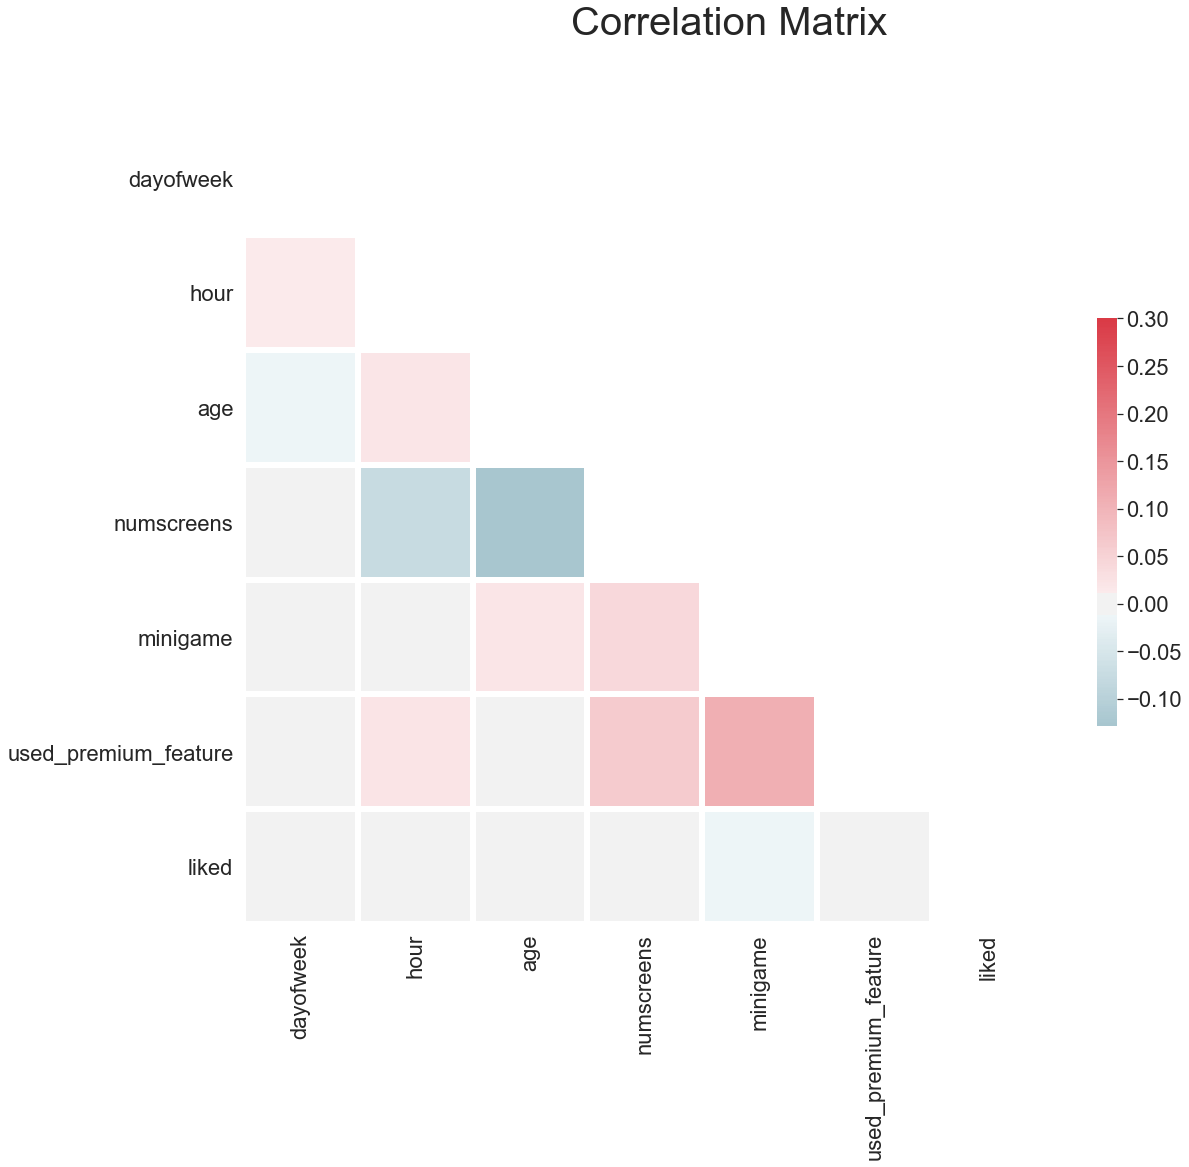

In [147]:
sns.set(style='white',font_scale=2)
corr=data2.corr()
#mask for upper triangle
#because lower end is same as upper end
#thus, no upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#setup matplot fig
f,ax=plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix',fontsize=40)

#generate a custom diverging colormap
cmap=sns.diverging_palette(220,10,as_cmap=True)

#
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=5,cbar_kws={'shrink':.5})

In [148]:
#Not highly correlated , thus independent variables

# Feature Engineering - response variable

* Fine tune response variable
* decide cutoff for response variable
* this time based limit is important so that you can validate your model later
* If time limit is lifetime enrollment, you need to wait forever to find out if your model was right or not



In [149]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [150]:
data['first_open']=[parser.parse(row_data) for row_data in data['first_open']]

In [151]:
data['enrolled_date']=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in data['enrolled_date']]

In [152]:
#Difference in hours
data['difference']=(data['enrolled_date']-data['first_open']).astype('timedelta64[h]')

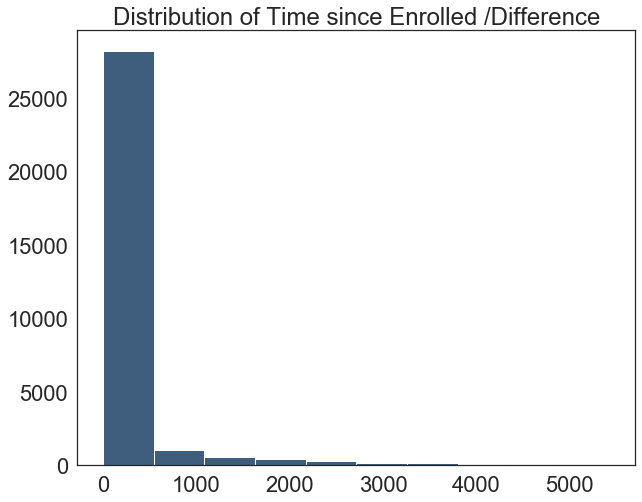

In [153]:
plt.figure(figsize=(10,8))
plt.hist(data['difference'].dropna(),color='#3F5D7D')
plt.title('Distribution of Time since Enrolled /Difference');

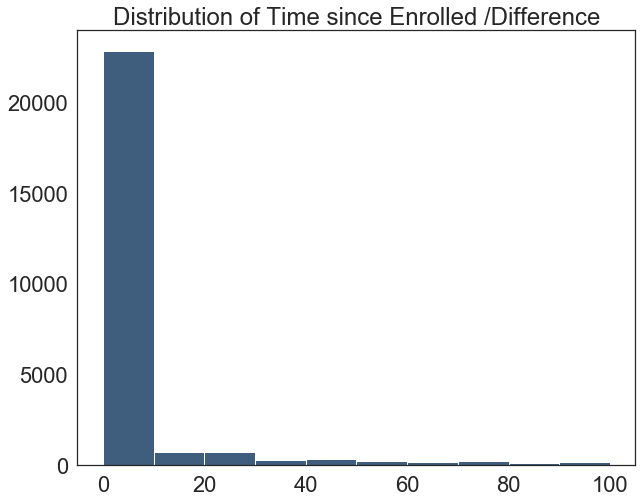

In [154]:
#Most enrolled in 500 hours!
#Lets dig again
plt.figure(figsize=(10,8))
plt.hist(data['difference'].dropna(),color='#3F5D7D',range=[0,100])
plt.title('Distribution of Time since Enrolled /Difference');

In [155]:
#Most enrolled in first 10 hours and some upto 80 hours

In [156]:
#Cutoff could be 48 hours

In [157]:
data.loc[data.difference>48,'enrolled']=0

In [158]:
# So we have a response variable of who enrolled in 48 hours

In [159]:
data.drop(columns=['difference','enrolled_date','first_open'],inplace=True)

In [160]:
data

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


# Feature Engineering - Features

* Screen_list need to be made model suitable
* One hot encoding is an option but cant be done since it will increase dimensionality
* Based on expert advice, we select only the important screen items

In [161]:
top_screen=pd.read_csv('top_screens.csv').top_screens.values

In [162]:
data['screen_list']=data['screen_list'].astype('str')+',' 
# extra comma makes number of commas = number of screens

In [163]:
#create column for each top screen
#contains Returns boolean, we need 1 /0 integer
for sc in top_screen:
    data[sc]=data.screen_list.str.contains(sc).astype('int')
    data['screen_list']=data.screen_list.str.replace(sc+',','')

In [164]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked', 'Loan2',
       'location', 'Institutions', 'Credit3Container', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category',
       'Splash', 'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1',
       'EditProfile', 'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1',
       'Alerts', 'Saving8', 'Saving10', 'Leaderboard', 'Saving4',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loa

In [165]:
#Now we are left with columns not in top list
#we count comma
data['other']=data.screen_list.str.count(',')

In [166]:
data.drop(columns=['screen_list'],inplace=True)

In [167]:
#Funnels
# Group all screens that are strongly correlated
# Merge into one column

In [168]:
cm_screens=data.columns[data.columns.str.contains('Credit')]

In [169]:
cc_screens=data.columns[data.columns.str.contains('CC')]

In [170]:
loan_screens=data.columns[data.columns.str.contains('Loan')]

In [171]:
savings_screen=data.columns[data.columns.str.contains('Saving')]

In [172]:
data['CM_count']=data[cm_screens].sum(axis=1) #Row wise Sum

In [173]:
data['CC_count']=data[cc_screens].sum(axis=1)

In [174]:
data['Loan_count']=data[loan_screens].sum(axis=1)

In [175]:
data['Savings_screen']=data[savings_screen].sum(axis=1)

In [176]:
import itertools
not_needed=list(itertools.chain(cm_screens,cc_screens,loan_screens,savings_screen))

In [177]:
data.drop(columns=not_needed,inplace=True)

In [178]:
data.shape

(50000, 50)

In [179]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other', 'CM_count',
       'CC_count', 'Loan_count', 'Savings_screen'],
      dtype='object')

In [180]:
data.to_csv('new_app_data.csv',index=False)

# Data Preprocessing

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int64
 10  Institutions             50000 non-null  int64
 11  VerifyPhone              50000 non-null  int64
 12  BankVerification         50000 non-null  int64
 13  VerifyDateOfBirth        50000 non-null  int64
 14  ProfilePage              50000 non-null  int64
 15  Ve

In [182]:
response=data['enrolled']

In [183]:
data=data.drop(columns=['enrolled'])

In [184]:
#Split in train test
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test=train_test_split(data,response,test_size=0.2)

In [186]:
X_train.shape

(40000, 49)

In [187]:
X_test.shape

(10000, 49)

In [188]:
#Remove user id but we would need it later & thus, save it
train_identifier=X_train['user']
test_identifier=X_test['user']

In [189]:
X_train=X_train.drop(columns=['user'])
X_test=X_test.drop(columns=['user'])

In [190]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [191]:
sc=StandardScaler()

In [192]:
#But we need to keep index and columns not be lost in arrays
X_train2=pd.DataFrame(sc.fit_transform(X_train))

In [193]:
X_test2=pd.DataFrame(sc.transform(X_test))

In [194]:
X_train2.columns,X_test2.columns=X_train.columns,X_test.columns

In [195]:
#Take index from original
X_train2.index=X_train.index.values

In [196]:
X_test2.index=X_test.index.values

In [197]:
#Old to NEw
X_train=X_train2
X_test=X_test2

In [198]:
X_test2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,CM_count,CC_count,Loan_count,Savings_screen
32896,0.477941,-1.690411,0.116421,-0.326602,-0.349133,-0.457013,-0.444165,0.963708,1.550660,0.949665,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-0.333215,0.056226,-0.289377,0.313702,-0.259834
40331,-1.490870,-1.421211,-1.456394,-0.453946,-0.349133,-0.457013,-0.444165,0.963708,-0.644887,0.949665,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,0.211543,-0.763393,-0.289377,0.313702,-0.259834
32375,0.970144,1.001594,-0.901283,0.564809,-0.349133,-0.457013,-0.444165,0.963708,1.550660,0.949665,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,0.211543,1.695463,-0.289377,0.313702,-0.259834
17103,-0.506464,1.405395,1.226643,-0.963324,-0.349133,-0.457013,-0.444165,-1.037659,1.550660,-1.053003,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-1.150353,0.056226,-0.289377,0.313702,-0.259834
36514,-0.014262,0.193993,0.764050,4.512488,-0.349133,2.188121,-0.444165,0.963708,-0.644887,0.949665,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,0.756302,-0.763393,-0.289377,0.313702,4.729093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,1.462347,0.597794,0.486495,2.474976,-0.349133,-0.457013,-0.444165,-1.037659,1.550660,-1.053003,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-0.060836,1.695463,-0.289377,1.793429,-0.259834
5830,-0.506464,0.866994,1.874273,-1.281685,-0.349133,-0.457013,-0.444165,-1.037659,-0.644887,-1.053003,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-1.422733,-0.763393,-0.289377,-1.166025,-0.259834
27028,1.462347,0.866994,0.116421,-0.963324,-0.349133,-0.457013,-0.444165,-1.037659,1.550660,-1.053003,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-1.422733,0.056226,-0.289377,-1.166025,1.165574
43657,-0.998667,1.136195,-0.346172,-1.218013,-0.349133,-0.457013,-0.444165,-1.037659,-0.644887,-1.053003,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-1.695112,-0.763393,-0.289377,-1.166025,-0.259834


In [199]:
X_test

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,CM_count,CC_count,Loan_count,Savings_screen
32896,0.477941,-1.690411,0.116421,-0.326602,-0.349133,-0.457013,-0.444165,0.963708,1.550660,0.949665,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-0.333215,0.056226,-0.289377,0.313702,-0.259834
40331,-1.490870,-1.421211,-1.456394,-0.453946,-0.349133,-0.457013,-0.444165,0.963708,-0.644887,0.949665,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,0.211543,-0.763393,-0.289377,0.313702,-0.259834
32375,0.970144,1.001594,-0.901283,0.564809,-0.349133,-0.457013,-0.444165,0.963708,1.550660,0.949665,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,0.211543,1.695463,-0.289377,0.313702,-0.259834
17103,-0.506464,1.405395,1.226643,-0.963324,-0.349133,-0.457013,-0.444165,-1.037659,1.550660,-1.053003,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-1.150353,0.056226,-0.289377,0.313702,-0.259834
36514,-0.014262,0.193993,0.764050,4.512488,-0.349133,2.188121,-0.444165,0.963708,-0.644887,0.949665,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,0.756302,-0.763393,-0.289377,0.313702,4.729093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,1.462347,0.597794,0.486495,2.474976,-0.349133,-0.457013,-0.444165,-1.037659,1.550660,-1.053003,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-0.060836,1.695463,-0.289377,1.793429,-0.259834
5830,-0.506464,0.866994,1.874273,-1.281685,-0.349133,-0.457013,-0.444165,-1.037659,-0.644887,-1.053003,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-1.422733,-0.763393,-0.289377,-1.166025,-0.259834
27028,1.462347,0.866994,0.116421,-0.963324,-0.349133,-0.457013,-0.444165,-1.037659,1.550660,-1.053003,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-1.422733,0.056226,-0.289377,-1.166025,1.165574
43657,-0.998667,1.136195,-0.346172,-1.218013,-0.349133,-0.457013,-0.444165,-1.037659,-0.644887,-1.053003,...,-0.121828,-0.115435,-0.11599,-0.092177,-0.088233,-1.695112,-0.763393,-0.289377,-1.166025,-0.259834


# Model Building

In [200]:
from sklearn.linear_model import LogisticRegression

* To address other correlations between screens,
* LASSO (L1) will penalize the field that is strongly correlated to response variable.
* Because one screen would always appear before enrollment,
    and that would turn up as strongly correlated to response variable. But we dont want to prioritize one screen over other via big coefficients.



In [201]:
log_clf=LogisticRegression(penalty='l1',solver='liblinear') 

In [202]:
log_clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
y_pred=log_clf.predict(X_test)

In [205]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

# Model Evaluation

In [207]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score

In [208]:
cm=confusion_matrix(y_test,y_pred)

In [209]:
accuracy_score(y_test,y_pred)

0.7629

In [210]:
#Precision - 
# TP/TP+FP
#How many out of total positives predicted, how many did we predict correctly

In [211]:
precision_score(y_test,y_pred) #same as accuracy

0.762660158633313

In [212]:
#Recall score
#TP/TP+FN
#Out of all actual positives, how many did we capture
recall_score(y_test,y_pred)

0.7569640694388373

In [213]:
f1_score(y_test,y_pred)

0.7598014385573905

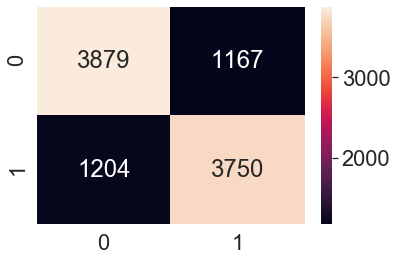

In [218]:
sns.heatmap(cm,annot=True,fmt='g');

# K fold cross validation
## Guarantee that model works on all sorts of data in the population and doesnt overfit any specific part.

In [219]:
from sklearn.model_selection import cross_val_score

In [220]:
accuracies=cross_val_score(estimator=log_clf,cv=5,X=X_train,y=y_train)

In [221]:
print("Logistic Accuracy:%0.3f (+/-%0.3f)"%(accuracies.mean(),accuracies.std()))

Logistic Accuracy:0.769 (+/-0.005)


# Model conclusion

In [222]:
#Format the results

In [223]:
final_results=pd.concat([y_test,test_identifier],axis=1).dropna()

In [224]:
final_results['predicted']=y_pred

In [225]:
final_results[['user','enrolled','predicted']].reset_index(drop=True)

,user,enrolled,predicted
0,325888,0,0
1,214447,1,1
2,37998,1,1
3,341320,0,0
4,133568,0,0
...,...,...,...
9995,212260,1,0
9996,84233,0,0
9997,58579,0,0
9998,230158,0,0


# Concluding remarks
* Users who arent willing to convert should be converted
* Those willing to convert will do so even without targeting.
* Thus, we can offer - one month free or 50% off yearly subscriptions.